# Opening Thoughts
Raj recently talked about opening a new location, but doesn't know where. It gave me a new project idea: use data to determine the 'best' location to open a restaurant. To do so, I'd need to collect data from scratch. And I need to webscrape Yelp and Google. But I still need more experience with webscraping, there are some Yelp and Google Maps policies that don't really allow me to scrape the data. So I'll generate a fake dataset with fake values to see how I can approach this model. 

In [32]:
import pandas as pd
import random
import numpy as np

In [33]:
# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate fake data
num_locations = 100
locations = [f"Location_{i}" for i in range(1, num_locations + 1)]
latitudes = [round(random.uniform(37.7, 37.8), 6) for _ in range(num_locations)]
longitudes = [round(random.uniform(-122.5, -122.4), 6) for _ in range(num_locations)]
average_income = [round(random.uniform(30000, 100000), 2) for _ in range(num_locations)]
population_density = [round(random.uniform(500, 20000), 2) for _ in range(num_locations)]
competition_score = [round(random.uniform(1, 10), 2) for _ in range(num_locations)]

# Generate the num_competitors column
num_competitors = [random.randint(1, 10) for _ in range(num_locations)]

# Create a DataFrame
data = {
    'Location': locations,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Average_Income': average_income,
    'Population_Density': population_density,
    'Competition_Score': competition_score,
    'Num_Competitors': num_competitors  # Adding the new column
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('restaurant_locations_with_competitors.csv', index=False)


In [34]:
#df['Competition_Score'] = df['Population_Density'] * (1 + df['Num_Competitors'] / 10)
#df.to_csv('restaurant_competition.csv', index=False)

In [35]:
locations = pd.read_csv('restaurant_locations_with_competitors.csv')
#competition = pd.read_csv('restaurant_competition.csv')

In [36]:
locations.head()

,Location,Latitude,Longitude,Average_Income,Population_Density,Competition_Score,Num_Competitors
0,Location_1,37.763943,-122.498852,97829.74,18126.61,4.98,10
1,Location_2,37.702501,-122.427928,94845.69,11139.01,2.92,9
2,Location_3,37.727503,-122.431829,89408.70,16774.60,5.26,1
3,Location_4,37.722321,-122.446303,41641.78,11858.94,9.11,7
4,Location_5,37.773647,-122.473317,63994.88,3387.83,8.16,10


In [37]:
location_headers = df.columns

In [38]:
locations.tail()

,Location,Latitude,Longitude,Average_Income,Population_Density,Competition_Score,Num_Competitors
95,Location_96,37.738162,-122.413865,68617.63,6094.82,7.11,10
96,Location_97,37.799612,-122.444967,59938.08,8882.82,4.64,5
97,Location_98,37.752911,-122.494941,30676.88,11809.70,2.49,6
98,Location_99,37.797108,-122.400072,35267.07,13266.76,5.21,4
99,Location_100,37.786078,-122.416397,91817.45,9567.27,2.15,2


In [47]:
sorted_locations_income = locations.sort_values(by = 'Average_Income', ascending = False)

In [48]:
sorted_locations_income.head()

,Location,Latitude,Longitude,Average_Income,Population_Density,Competition_Score,Num_Competitors
54,Location_55,37.764804,-122.487900,99891.81,19422.81,3.23,2
55,Location_56,37.760913,-122.477530,99726.75,3982.07,6.74,10
15,Location_16,37.754494,-122.412948,99679.59,17740.63,1.22,6
67,Location_68,37.703210,-122.433102,99106.31,14321.31,7.25,10
9,Location_10,37.702980,-122.404618,98971.62,17283.70,4.02,3


In [65]:
least_competitive_location = sorted_locations_income.sort_values(by = 'Competition_Score', ascending = True)
least_competitive_location[:10]

,Location,Latitude,Longitude,Average_Income,Population_Density,Competition_Score,Num_Competitors
81,Location_82,37.726274,-122.432664,44251.81,6356.28,1.05,2
27,Location_28,37.709672,-122.407090,89690.39,18650.91,1.05,9
15,Location_16,37.754494,-122.412948,99679.59,17740.63,1.22,6
93,Location_94,37.742216,-122.407673,48336.87,11184.78,1.26,8
35,Location_36,37.755204,-122.451401,38392.06,17242.57,1.45,4
69,Location_70,37.726774,-122.486769,30547.62,18548.72,1.58,10
19,Location_20,37.700650,-122.484716,50769.55,18632.68,1.66,6
60,Location_61,37.798952,-122.492901,91660.49,14706.63,1.70,7
6,Location_7,37.789218,-122.488845,58072.82,6511.04,1.76,1
30,Location_31,37.780713,-122.469249,35607.80,16309.61,1.96,4


In [80]:
highest_income_low_competition = []
for index, row in least_competitive_location.iterrows():
    income = row[3]
    competition = row[5]
    if (income > 70000 and competition < 5):
        highest_income_low_competition.append(row)

In [81]:
best_locations = pd.DataFrame(highest_income_low_competition)

In [82]:
populous_locs = best_locations.sort_values(by = 'Population_Density', ascending = False)

In [83]:
populous_locs

,Location,Latitude,Longitude,Average_Income,Population_Density,Competition_Score,Num_Competitors
54,Location_55,37.764804,-122.487900,99891.81,19422.81,3.23,2
27,Location_28,37.709672,-122.407090,89690.39,18650.91,1.05,9
0,Location_1,37.763943,-122.498852,97829.74,18126.61,4.98,10
15,Location_16,37.754494,-122.412948,99679.59,17740.63,1.22,6
20,Location_21,37.780582,-122.423749,97809.66,17359.81,4.73,7
9,Location_10,37.702980,-122.404618,98971.62,17283.70,4.02,3
32,Location_33,37.753623,-122.412199,71652.46,15853.80,2.58,1
14,Location_15,37.764988,-122.408737,97012.23,15712.27,2.79,7
72,Location_73,37.787637,-122.452733,76437.21,14968.03,4.74,9
25,Location_26,37.733659,-122.467584,70892.43,14863.01,3.20,8


In [84]:
top_locations = [] #based on highest income, lowest compeition and most density
for index, row in populous_locs.iterrows():
    density = row[4]
    if density > 10000:
        top_locations.append(row)

In [85]:
top_locations = pd.DataFrame(top_locations)

In [86]:
top_locations

,Location,Latitude,Longitude,Average_Income,Population_Density,Competition_Score,Num_Competitors
54,Location_55,37.764804,-122.487900,99891.81,19422.81,3.23,2
27,Location_28,37.709672,-122.407090,89690.39,18650.91,1.05,9
0,Location_1,37.763943,-122.498852,97829.74,18126.61,4.98,10
15,Location_16,37.754494,-122.412948,99679.59,17740.63,1.22,6
20,Location_21,37.780582,-122.423749,97809.66,17359.81,4.73,7
9,Location_10,37.702980,-122.404618,98971.62,17283.70,4.02,3
32,Location_33,37.753623,-122.412199,71652.46,15853.80,2.58,1
14,Location_15,37.764988,-122.408737,97012.23,15712.27,2.79,7
72,Location_73,37.787637,-122.452733,76437.21,14968.03,4.74,9
25,Location_26,37.733659,-122.467584,70892.43,14863.01,3.20,8


For this fake dataset project I learned:
1. sort_values
2. iterrows()
3. creating dataframes from lists
4. to sort values after values
5. read_csv() function instead of the whole opened_file = open() blah blah blah

So once you have the cleaned data, all you have to do is sort this sort that. exploratory data this explore data that.

## Preliminary Data Exploration

Before diving into the analysis, I would perform some initial exploratory data analysis to get a sense of the dataset's structure and contents:


In [87]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics of the numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            100 non-null    object 
 1   Latitude            100 non-null    float64
 2   Longitude           100 non-null    float64
 3   Average_Income      100 non-null    float64
 4   Population_Density  100 non-null    float64
 5   Competition_Score   100 non-null    float64
 6   Num_Competitors     100 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB
None
         Latitude   Longitude  Average_Income  Population_Density  \
count  100.000000  100.000000      100.000000            100.0000   
mean    37.747957 -122.451112    65773.678300          10999.8506   
std      0.029500    0.029314    21283.191839           5745.6493   
min     37.700650 -122.499943    30248.200000            507.9200   
25%     37.722673 -122.477018    47103.30750

## Step 3: Identify Promising Locations

Next, I would identify potential locations that meet the criteria of high income, low competition, and high population density. Here's how I would approach each criterion:

In [89]:
#High Income Locations:
high_income_locations = df[df['Average_Income'] > 70000]


In [90]:
#Low Competition Locations:
low_competition_locations = df.sort_values(by='Competition_Score').head(10)


In [91]:
#High Population Density Locations:
high_density_locations = df.sort_values(by='Population_Density', ascending=False).head(10)


## Step 4: Combine Criteria

To find the best potential locations that fulfill all three criteria (high income, low competition, high population density), I would combine the results from the previous steps:

In [92]:
best_locations = high_income_locations.merge(low_competition_locations, on='Location').merge(high_density_locations, on='Location')


This is kinda what I wanted to do. merge the tables, but I didnt know how to do so. 

## Step 5: Visualization

Visualizing the potential locations on a map can provide a clearer understanding of their distribution. You can use libraries like matplotlib or seaborn for this purpose.

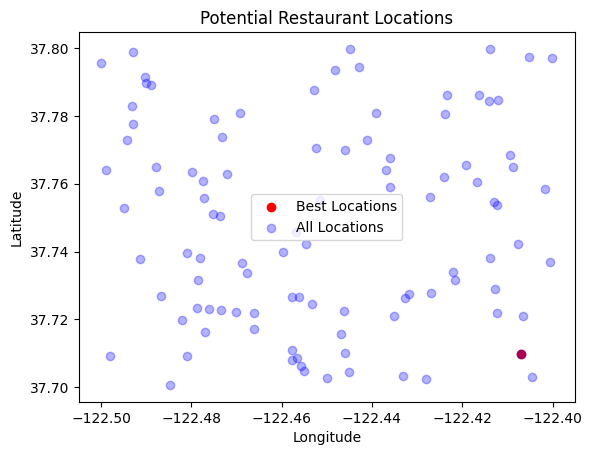

In [93]:
import matplotlib.pyplot as plt

plt.scatter(best_locations['Longitude'], best_locations['Latitude'], c='red', label='Best Locations')
plt.scatter(df['Longitude'], df['Latitude'], c='blue', alpha=0.3, label='All Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Potential Restaurant Locations')
plt.legend()
plt.show()


This visualization will show the best potential locations in red and all locations in blue.

Please note that this is a simplified analysis. In a real-world scenario, I would likely use more sophisticated methods, consider additional factors, and potentially use machine learning techniques to make more informed decisions about the best locations to open a restaurant.

# Me
I agree that there are additional factors because in the fake dataset, there were no sales and no type of cuisine in the dataset and what type of culture the city has. 

# Websearch: 

In a real-world analysis for determining the best locations to open a restaurant, there are many additional factors that should be considered beyond what's provided in the fake dataset. Here are some of the factors to take into account:

__Cuisine and Culture__: Understanding the local culture, preferences, and culinary trends is crucial. Certain cuisines may be more popular or better suited to a particular neighborhood or city.

__Sales and Revenue Data__: Historical sales and revenue data for existing restaurants in different areas can provide insights into potential customer demand and market saturation.

__Foot Traffic__: Analyzing foot traffic patterns, both during different times of the day and different days of the week, can help you assess the visibility and potential customer flow in a location.

__Competitor Analysis__: In addition to just the number of competitors, analyzing the types of cuisines, pricing strategies, and customer reviews of existing restaurants can help you position your restaurant effectively.

__Local Regulations__: Different areas might have varying regulations related to zoning, permits, alcohol licenses, health codes, and more, which can impact the feasibility of opening a restaurant.

__Demographics__: A deeper understanding of the demographics of different neighborhoods can help tailor restaurant concept to the target audience.

__Economic Trends__: Analyzing economic trends, such as employment rates, disposable income, and overall economic health of an area, can impact the potential customer base.

__Accessibility and Parking__: Ease of access, parking availability, and proximity to public transportation can influence customer convenience.

__Social Media and Online Presence__: Analyzing social media activity and online presence of existing restaurants can provide insights into customer engagement and preferences.

__Cultural Events and Festivals__: Understanding local cultural events and festivals can help align restaurant's offerings with the community's interests.

# Foot Traffic
I learned some things regarding foot traffic, I can use the number of reviews on platforms like Yelp and Google Reviews as a rough proxy for estimating foot traffic. While it might not provide an exact measurement of foot traffic, the number of reviews can offer some insights into the popularity and activity level of a restaurant, which could be correlated with foot traffic.

Here's how you I might approach this:

Assumption of Correlation: I can assume that a higher number of reviews indicates a higher level of customer activity, which could be associated with higher foot traffic. While this correlation might not be perfect (as some people might not leave reviews), it can still provide a rough estimate.

Caveats: factors such as the type of cuisine, restaurant size, location, and the overall customer experience can influence the number of reviews. Therefore, this method provides a very high-level estimate and might not accurately reflect foot traffic.

Normalization: Since the number of reviews can vary widely between restaurants, it's a good idea to normalize this data. I can divide the number of reviews by the restaurant's average income or population density to account for these variations.

Comparative Analysis: Use the normalized review counts to perform a comparative analysis among restaurants. Higher normalized review counts might suggest relatively higher foot traffic or customer engagement.

While using review counts as a proxy for foot traffic has limitations, it can still provide me with some insights into the relative popularity and activity levels of different restaurants. Just be aware that it's an indirect approach and should be interpreted with caution.

In a real-world scenario, I would ideally collect more specific foot traffic data using one of the methods mentioned earlier to get a more accurate understanding of customer activity.